In [7]:
import nltk
from os import getcwd
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples
# from utils import  build_freqs

ImportError: cannot import name 'build_freqs' from 'utils' (/Applications/miniforge3/envs/py310/lib/python3.10/site-packages/utils/__init__.py)

In [59]:
from nltk import PorterStemmer,TweetTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import string
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  
                word not in string.punctuation): 
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean




def build_freqs(tweets, ys):
    freqs = {}
    yslist = np.squeeze(ys).tolist()
    for y,tweet in zip(yslist, tweets): 
        for word in process_tweet(tweet): 
            pair = (word, y) 
            if pair in freqs: 
                freqs[pair] += 1 
            else: 
                freqs[pair] = 1
    return freqs

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dongxiaoxuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
nltk.download('twitter_samples')
all_positive_tweets = twitter_samples.strings('positive_tweets.json') 
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
test_pos = all_positive_tweets[4000:] 
test_pos_label = [1 for _ in range(1000)] 
train_pos = all_positive_tweets[:4000]
train_pos_label = [1 for _ in range(4000)] 
test_neg = all_negative_tweets[4000:] 
test_neg_label = [0 for _ in range(1000)] 
train_neg = all_negative_tweets[:4000]
train_neg_label = [0 for _ in range(4000)] 
train_x = train_pos + train_neg 
test_x = test_pos + test_neg
# train_y = np.array(train_pos_label + train_neg_label)
# test_y = np.array(test_pos_label + test_neg_label)
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/dongxiaoxuan/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [73]:
test_x[1]

"@heyclaireee is back! thnx God!!! i'm so happy :)"

In [60]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)
# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11338


In [61]:
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


In [41]:
train_x

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [62]:
def sigmoid(z): 

    h = 1/(1+np.exp(-z))
    return h

def gradientDescent(x, y, theta, alpha, num_iters):
   
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))
        print(i)
        print(np.dot(y.transpose(), np.log(h)))
        print(np.dot((1-y).transpose(),np.log(1-h)))
        # update the weights theta
        theta =  theta - (alpha/m) * np.dot(x.transpose(),(h-y))
        
    J = float(J)
    return J, theta

def extract_features(tweet, freqs):
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0), 0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0), 0)
        
    assert(x.shape == (1, 3))
    return x

In [43]:
x = np.zeros((1, 3)) 
x

array([[0., 0., 0.]])

In [63]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)
# training labels corresponding to X
Y = train_y
# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

0
[[-2772.58872224]]
[[-2772.58872224]]
1
[[-2770.13487451]]
[[-2766.47194299]]
2
[[-2767.68467742]]
[[-2760.37785818]]
3
[[-2765.23812717]]
[[-2754.30638161]]
4
[[-2762.79521997]]
[[-2748.2574271]]
5
[[-2760.35595198]]
[[-2742.23090851]]
6
[[-2757.92031937]]
[[-2736.22673976]]
7
[[-2755.4883183]]
[[-2730.24483478]]
8
[[-2753.0599449]]
[[-2724.28510761]]
9
[[-2750.63519529]]
[[-2718.34747229]]
10
[[-2748.21406558]]
[[-2712.43184296]]
11
[[-2745.79655188]]
[[-2706.53813382]]
12
[[-2743.38265025]]
[[-2700.66625914]]
13
[[-2740.97235677]]
[[-2694.81613328]]
14
[[-2738.5656675]]
[[-2688.98767066]]
15
[[-2736.16257847]]
[[-2683.18078582]]
16
[[-2733.76308572]]
[[-2677.39539336]]
17
[[-2731.36718525]]
[[-2671.63140801]]
18
[[-2728.97487307]]
[[-2665.88874458]]
19
[[-2726.58614517]]
[[-2660.167318]]
20
[[-2724.20099752]]
[[-2654.46704329]]
21
[[-2721.81942607]]
[[-2648.78783563]]
22
[[-2719.44142679]]
[[-2643.12961028]]
23
[[-2717.0669956]]
[[-2637.49228264]]
24
[[-2714.69612842]]
[[-2631.875

[[-1657.19048587]]
292
[[-2193.10424762]]
[[-1654.88391926]]
293
[[-2191.52735077]]
[[-1652.58403167]]
294
[[-2189.95280808]]
[[-1650.29079698]]
295
[[-2188.38061555]]
[[-1648.00418921]]
296
[[-2186.81076918]]
[[-1645.72418247]]
297
[[-2185.24326495]]
[[-1643.45075102]]
298
[[-2183.67809889]]
[[-1641.18386923]]
299
[[-2182.11526698]]
[[-1638.9235116]]
300
[[-2180.55476527]]
[[-1636.66965273]]
301
[[-2178.99658975]]
[[-1634.42226737]]
302
[[-2177.44073647]]
[[-1632.18133035]]
303
[[-2175.88720146]]
[[-1629.94681665]]
304
[[-2174.33598075]]
[[-1627.71870135]]
305
[[-2172.78707039]]
[[-1625.49695966]]
306
[[-2171.24046643]]
[[-1623.28156689]]
307
[[-2169.69616493]]
[[-1621.07249848]]
308
[[-2168.15416195]]
[[-1618.86972998]]
309
[[-2166.61445356]]
[[-1616.67323705]]
310
[[-2165.07703582]]
[[-1614.48299547]]
311
[[-2163.54190482]]
[[-1612.29898113]]
312
[[-2162.00905665]]
[[-1610.12117002]]
313
[[-2160.47848739]]
[[-1607.94953828]]
314
[[-2158.95019315]]
[[-1605.78406211]]
315
[[-2157.4241

504
[[-1905.63724886]]
[[-1283.58895528]]
505
[[-1904.47853035]]
[[-1282.26714956]]
506
[[-1903.32144055]]
[[-1280.94844964]]
507
[[-1902.16597659]]
[[-1279.63284532]]
508
[[-1901.01213563]]
[[-1278.32032645]]
509
[[-1899.85991482]]
[[-1277.01088293]]
510
[[-1898.70931134]]
[[-1275.70450469]]
511
[[-1897.56032235]]
[[-1274.40118171]]
512
[[-1896.41294502]]
[[-1273.100904]]
513
[[-1895.26717655]]
[[-1271.80366162]]
514
[[-1894.1230141]]
[[-1270.50944467]]
515
[[-1892.98045487]]
[[-1269.21824328]]
516
[[-1891.83949605]]
[[-1267.93004764]]
517
[[-1890.70013485]]
[[-1266.64484796]]
518
[[-1889.56236846]]
[[-1265.3626345]]
519
[[-1888.4261941]]
[[-1264.08339756]]
520
[[-1887.29160898]]
[[-1262.80712747]]
521
[[-1886.15861033]]
[[-1261.53381461]]
522
[[-1885.02719535]]
[[-1260.26344939]]
523
[[-1883.89736129]]
[[-1258.99602228]]
524
[[-1882.76910538]]
[[-1257.73152375]]
525
[[-1881.64242485]]
[[-1256.46994435]]
526
[[-1880.51731696]]
[[-1255.21127464]]
527
[[-1879.39377894]]
[[-1253.95550523

898
[[-1550.85621327]]
[[-930.03705217]]
899
[[-1550.16321456]]
[[-929.4339832]]
900
[[-1549.47104716]]
[[-928.83193289]]
901
[[-1548.77970973]]
[[-928.23089878]]
902
[[-1548.08920092]]
[[-927.63087839]]
903
[[-1547.39951936]]
[[-927.03186926]]
904
[[-1546.71066372]]
[[-926.43386893]]
905
[[-1546.02263263]]
[[-925.83687495]]
906
[[-1545.33542477]]
[[-925.2408849]]
907
[[-1544.64903879]]
[[-924.64589632]]
908
[[-1543.96347334]]
[[-924.0519068]]
909
[[-1543.2787271]]
[[-923.45891392]]
910
[[-1542.59479872]]
[[-922.86691527]]
911
[[-1541.91168688]]
[[-922.27590845]]
912
[[-1541.22939025]]
[[-921.68589106]]
913
[[-1540.5479075]]
[[-921.09686071]]
914
[[-1539.86723731]]
[[-920.50881504]]
915
[[-1539.18737836]]
[[-919.92175165]]
916
[[-1538.50832932]]
[[-919.33566819]]
917
[[-1537.83008888]]
[[-918.7505623]]
918
[[-1537.15265573]]
[[-918.16643162]]
919
[[-1536.47602856]]
[[-917.58327382]]
920
[[-1535.80020605]]
[[-917.00108656]]
921
[[-1535.12518691]]
[[-916.41986751]]
922
[[-1534.45096982]]

1138
[[-1405.61020544]]
[[-809.76202206]]
1139
[[-1405.08306564]]
[[-809.34671232]]
1140
[[-1404.55649529]]
[[-808.93199597]]
1141
[[-1404.03049352]]
[[-808.51787179]]
1142
[[-1403.50505947]]
[[-808.10433855]]
1143
[[-1402.98019228]]
[[-807.69139501]]
1144
[[-1402.4558911]]
[[-807.27903996]]
1145
[[-1401.93215506]]
[[-806.86727217]]
1146
[[-1401.40898331]]
[[-806.45609043]]
1147
[[-1400.886375]]
[[-806.04549352]]
1148
[[-1400.36432928]]
[[-805.63548022]]
1149
[[-1399.84284528]]
[[-805.22604934]]
1150
[[-1399.32192218]]
[[-804.81719967]]
1151
[[-1398.80155911]]
[[-804.40893]]
1152
[[-1398.28175524]]
[[-804.00123914]]
1153
[[-1397.76250971]]
[[-803.5941259]]
1154
[[-1397.24382169]]
[[-803.18758907]]
1155
[[-1396.72569033]]
[[-802.78162748]]
1156
[[-1396.20811479]]
[[-802.37623994]]
1157
[[-1395.69109424]]
[[-801.97142526]]
1158
[[-1395.17462784]]
[[-801.56718227]]
1159
[[-1394.65871476]]
[[-801.16350979]]
1160
[[-1394.14335415]]
[[-800.76040665]]
1161
[[-1393.62854519]]
[[-800.35787167]]

In [64]:
def predict_tweet(tweet, freqs, theta):
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    
    return y_pred

In [65]:
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.518581
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530899
great great great -> 0.546274
great great great great -> 0.561562


In [66]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)
# With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)   
    return accuracy

In [67]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


In [90]:
def score_test_logistic_regression(test, freqs, theta):
    
    # the list for storing predictions
    y_hat = []
    y_pred_list = []
    for tweet in test:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
            y_pred_list.append(y_pred)
        else:
            # append 0 to the list
            y_hat.append(0) 
            y_pred_list.append(y_pred)
    return y_hat, y_pred_list

In [84]:
# Apple report去掉xml处理好的text调用score_test_logistic_regression即可得到sentiment score
ata = pd.read_csv(r'Output2.csv',index_col=0)
ata

,ticker,cik,filing_date,10k_link,long_term_outlook,clean_text
0,EBAY,1065088,2001-03-28,https://www.sec.gov/Archives/edgar/data/106508...,1,united states commission washington form annua...
1,EBAY,1065088,2002-03-25,https://www.sec.gov/Archives/edgar/data/106508...,1,ebay form period ended united states commissio...
2,EBAY,1065088,2003-03-31,https://www.sec.gov/Archives/edgar/data/106508...,1,ebay form period ended united states commissio...
3,EBAY,1065088,2004-03-08,https://www.sec.gov/Archives/edgar/data/106508...,1,united states commission washington form annua...
4,EBAY,1065088,2005-02-28,https://www.sec.gov/Archives/edgar/data/106508...,0,united states commission washington form annua...
5,EBAY,1065088,2007-02-28,https://www.sec.gov/Archives/edgar/data/106508...,1,logical callerid iwidth length callerid iwidth...
6,EBAY,1065088,2009-02-20,https://www.sec.gov/Archives/edgar/data/106508...,1,width width width callerid iwidth length calle...
7,EBAY,1065088,2010-02-17,https://www.sec.gov/Archives/edgar/data/106508...,1,form united states commission washington form ...
8,EBAY,1065088,2012-01-31,https://www.sec.gov/Archives/edgar/data/106508...,1,public transitional document created using rig...
9,EBAY,1065088,2014-01-31,https://www.sec.gov/Archives/edgar/data/106508...,1,public transitional document created using rig...


In [85]:
ata['clean_text'][0]

'united states commission washington form annual report pursuant section fiscal year ended december transition report pursuant section transition period from commission file ebay exact name registrant specified charter delaware state other jurisdiction employer incorporation organization identification hamilton avenue jose california address principal executive offices registrant including area check whether registrant filed reports required filed section during past months such shorter period that registrant required file such reports been subject such filing requirements past days indicate check mark disclosure delinquent filers pursuant item regulation contained herein will contained best registrant knowledge definitive proxy information statements incorporated reference part this form amendment this form march there were shares registrant common stock outstanding which only class common voting stock registrant issued that date aggregate market voting stock held affiliates computed 

In [105]:
sentimentlabels = []
sentimentScores = []
cleantext = []
date = []
for i in range(len(ata)):
    date.append(ata['filing_date'][i])
    cleantext.append(ata['clean_text'][i])

sentimentlabels, sentimentScores=score_test_logistic_regression(cleantext,freqs, theta)
print(date)
print(sentimentScores)
print(sentimentlabels)

['2001-03-28', '2002-03-25', '2003-03-31', '2004-03-08', '2005-02-28', '2007-02-28', '2009-02-20', '2010-02-17', '2012-01-31', '2014-01-31', '2015-02-06', '2016-02-01', '2017-02-06']
[array([[0.99738524]]), array([[0.89687168]]), array([[0.89404235]]), array([[0.96346735]]), array([[0.98750895]]), array([[0.92141372]]), array([[0.63461949]]), array([[0.59794976]]), array([[0.37967357]]), array([[0.20028045]]), array([[0.35821293]]), array([[0.65959105]]), array([[0.61001618]])]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]


In [114]:
sentimentScores1 = []
# print(sentimentScores)
for i in range(len(sentimentScores)): 
    sentimentScores1.append( (sentimentScores[i][0][0]-0.5)*2)
sentimentScores1

[0.9947704832791993,
 0.7937433602927129,
 0.7880847046958528,
 0.9269346955522599,
 0.9750178938466108,
 0.842827442791658,
 0.26923897767005456,
 0.19589951350650314,
 -0.24065286287441057,
 -0.5994390912174766,
 -0.2835741458864588,
 0.31918209081692916,
 0.2200323543288829]

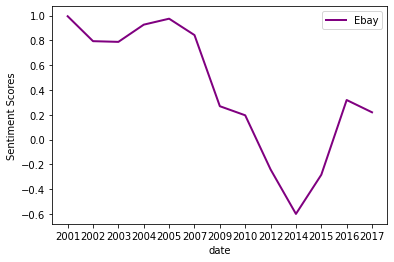

In [115]:
import numpy as np
import matplotlib.pyplot as plt

x = ['2001','2002','2003','2004','2005','2007','2009','2010','2012','2014','2015','2016','2017']
# x = [2001,2002,2003,2004,2005,2007,2009,2010,2012,2014,2015,2016,2017]
y = sentimentScores1
plt.plot(x, y, ls='-', lw=2,label = 'Ebay', color='purple')

plt.legend()
plt.xlabel('date')
plt.ylabel('Sentiment Scores')
plt.show()